# 鐵達尼號乘客資訊分析

## 資料預處理(最重要)

In [8]:
import urllib.request
import os

url="http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls"
filepath="data/titanic3.xls"
if not os.path.isfile(filepath):
    result=urllib.request.urlretrieve(url,filepath)
    print('downloaded:',result)

downloaded: ('data/titanic3.xls', <http.client.HTTPMessage object at 0x106ad6780>)


<module 'posixpath' from '//anaconda/lib/python3.5/posixpath.py'>

In [12]:
import numpy as np
import pandas as pd

all_df = pd.read_excel(filepath)

all_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [14]:
#去掉不需要的欄位
cols=['survived','name','pclass' ,'sex', 'age', 'sibsp',
      'parch', 'fare', 'embarked']
all_df=all_df[cols]

all_df[:2]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S


In [15]:
#檢查資料缺失
all_df.isnull().sum()

survived      0
name          0
pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [16]:
#去掉名字，直的部分 axis = 1
df=all_df.drop(['name'], axis=1)

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,0,1,female,2.0000,1,2,151.5500,S
3,0,1,male,30.0000,1,2,151.5500,S
4,0,1,female,25.0000,1,2,151.5500,S
5,1,1,male,48.0000,0,0,26.5500,S
6,1,1,female,63.0000,1,0,77.9583,S
7,0,1,male,39.0000,0,0,0.0000,S
8,1,1,female,53.0000,2,0,51.4792,S
9,0,1,male,71.0000,0,0,49.5042,C


In [17]:
#用平均值填補空缺資料，避免擴大誤差
age_mean = df['age'].mean()
df['age'] = df['age'].fillna(age_mean)

fare_mean = df['fare'].mean()
df['fare'] = df['fare'].fillna(fare_mean)

In [18]:
#將sex規劃成0和1
df['sex']= df['sex'].map({'female':0, 'male': 1}).astype(int)

df[:2]

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,S
1,1,1,1,0.9167,1,2,151.5500,S


In [19]:
#將embark同一欄三個種類分成三個欄位
x_OneHot_df = pd.get_dummies(data=df,columns=["embarked" ])

x_OneHot_df[0:2]

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,1,1,0,29.0000,0,0,211.3375,0,0,1
1,1,1,1,0.9167,1,2,151.5500,0,0,1


## 資料轉換成array

In [21]:
#轉換為array

ndarray = x_OneHot_df.values
ndarray.shape

(1309, 10)

In [22]:
ndarray[:2] #可以發現array的第一個數字都是是否survived

array([[   1.    ,    1.    ,    0.    ,   29.    ,    0.    ,    0.    ,
         211.3375,    0.    ,    0.    ,    1.    ],
       [   1.    ,    1.    ,    1.    ,    0.9167,    1.    ,    2.    ,
         151.55  ,    0.    ,    0.    ,    1.    ]])

In [23]:
#自己定義出label，就是每個row的第0個（label）跟其他人(features)分開
Label = ndarray[:,0]
Features = ndarray[:,1:]

In [24]:
Features.shape

(1309, 9)

In [26]:
Features[:2]

array([[   1.    ,    0.    ,   29.    ,    0.    ,    0.    ,  211.3375,
           0.    ,    0.    ,    1.    ],
       [   1.    ,    1.    ,    0.9167,    1.    ,    2.    ,  151.55  ,
           0.    ,    0.    ,    1.    ]])

In [27]:
Label.shape

(1309,)

In [28]:
Label[:2]

array([ 1.,  1.])

## 將Array標準化

In [29]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1)) #把最大最小壓在1~0之間
scaledFeatures=minmax_scale.fit_transform(Features)
scaledFeatures[:2]

array([[ 0.        ,  0.        ,  0.36116884,  0.        ,  0.        ,
         0.41250333,  0.        ,  0.        ,  1.        ],
       [ 0.        ,  1.        ,  0.00939458,  0.125     ,  0.22222222,
         0.2958059 ,  0.        ,  0.        ,  1.        ]])

In [30]:
Label[:5]

array([ 1.,  1.,  0.,  0.,  0.])

# 區分訓練和測試資料

In [39]:
#8成當成train data，2成test data
msk = np.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [40]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1309 train: 1006 test: 303


In [34]:
#上面一大串的表格預處理包

def PreprocessData(raw_df):
    df=raw_df.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex']= df['sex'].map({'female':0, 'male': 1}).astype(int)
    x_OneHot_df = pd.get_dummies(data=df,columns=["embarked" ])

    ndarray = x_OneHot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    
    return scaledFeatures,Label

In [35]:
#這些就是待會做模型的feature, label
train_Features , train_Label = PreprocessData(train_df)
test_Features , test_Label = PreprocessData(test_df)

In [36]:
train_Features[:2]

array([[ 0.        ,  0.        ,  0.3598329 ,  0.        ,  0.        ,
         0.41250333,  0.        ,  0.        ,  1.        ],
       [ 0.        ,  1.        ,  0.00732301,  0.125     ,  0.22222222,
         0.2958059 ,  0.        ,  0.        ,  1.        ]])

In [37]:
train_Label[:2]

array([ 1.,  1.])

# 開始跑模型

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 50)                500       
_________________________________________________________________
dropout_11 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 40)                2040      
_________________________________________________________________
dropout_12 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 41        
Total params: 2,581
Trainable params: 2,581
Non-trainable params: 0
_________________________________________________________________
None
Train on 838 samples, validate on 210 samples
Epoch 1/20
1s - loss: 0.6879 - acc: 0.5716 - val_loss: 0.6538 - val_acc: 0.7762
Epoch 2/2

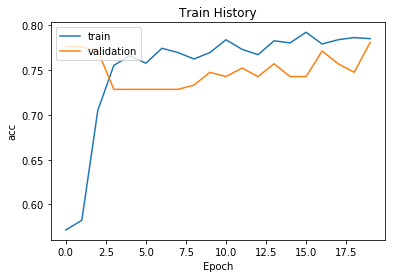

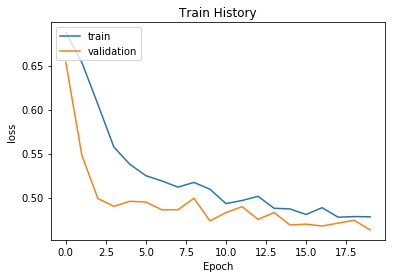

 32/261 [==>...........................] - ETA: 0s

accuracy= 0.808429118774
 32/261 [==>...........................] - ETA: 1smodel saved to disk


In [50]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()


######################### 建立模型
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential() #一層一層到底，按順序

#輸入層（隱藏層1）
model.add(Dense(units=50, 
                input_dim=9, 
                kernel_initializer='uniform', 
                activation='relu'))

#使用dropout避免overfitting
model.add(Dropout(0.5))

#隱藏層2，不用寫input_dim，因為就是前一層的units
model.add(Dense(units=40,  
                kernel_initializer='uniform', 
                activation='relu'))

#使用dropout避免overfitting
model.add(Dropout(0.5))


#輸出層
model.add(Dense(units=1, #輸出一個數字 
                kernel_initializer='uniform', 
                activation='sigmoid'))

print(model.summary()) #可以清楚看到model還有參數數量


######################### 訓練模型
#選擇loss度量，optimizer學習路徑速度、
model.compile(loss='binary_crossentropy',   #二元用binary
              optimizer='adam', metrics=['accuracy'])

#開始train，並且記錄情況(設有val項以免overfitting)
train_history=model.fit(x=train_Features, y=train_Label,
                        validation_split=0.2, epochs=20, batch_size=20, verbose=2) #verbose=2表示顯示訓練過程


######################### 訓練過程視覺化
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')


######################### 實際測驗得分
scores = model.evaluate(test_Features, test_Label)
print('\n')
print('accuracy=',scores[1])

######################### 紀錄模型預測情形（答案卷）
prediction = model.predict_classes(test_Features)

#儲存訓練結果
model.save_weights("Savemodel_Keras/Titanic_MLP.h5")
print('model saved to disk')

# 預測資料 （合併新資料）

In [51]:
Jack = pd.Series([0 ,'Jack',3, 'male'  , 23, 1, 0,  5.0000,'S'])
Rose = pd.Series([1 ,'Rose',1, 'female', 20, 1, 0, 100.0000,'S'])

JR_df = pd.DataFrame([list(Jack),list(Rose)],  
                     columns=['survived', 'name','pclass', 'sex', 'age', 'sibsp','parch', 'fare','embarked'])

all_df=pd.concat([all_df,JR_df])

all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


In [52]:
all_Features,Label = PreprocessData(all_df)

all_probability = model.predict(all_Features)
all_probability[:10] #前10位存活機率

array([[ 0.96011639],
       [ 0.54616326],
       [ 0.94506025],
       [ 0.40644002],
       [ 0.94673908],
       [ 0.26447845],
       [ 0.92866307],
       [ 0.28221643],
       [ 0.91790241],
       [ 0.26674265]], dtype=float32)

In [53]:
#合併成一張大表
pd=all_df

pd.insert(len(all_df.columns),
          'probability',all_probability)

In [54]:
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.176351
1,1,Rose,1,female,20.0,1,0,100.0,S,0.941407


# 生存機率高確沒有存活

In [55]:
pd[(pd['survived']==0) &  (pd['probability']>0.9) ]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.945060
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.946739
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.954967
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.954035
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.952636
